In [15]:
import pandas as pd
import matplotlib.pyplot as plt
from pydataset import data

In [65]:
df = data('diamonds')
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


### Problem 1.

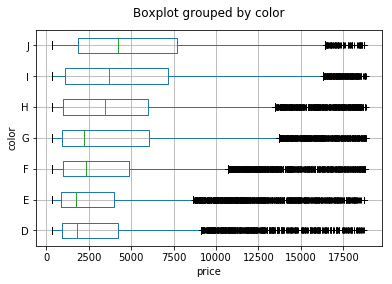

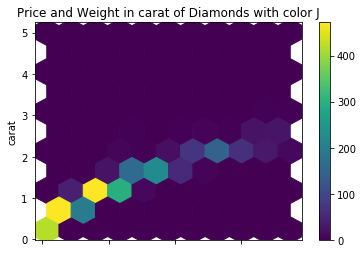

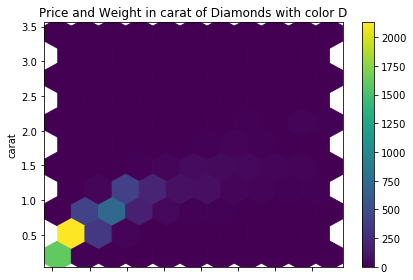

In [91]:
prop = 'color'
dfprop = df.groupby([prop])

plt.figure();
df[['price', prop]].boxplot(by=prop, vert=False, sym='k+');
plt.xlabel('price');
plt.title(' ');
plt.ylabel('color');

prop1 =dfprop.get_group('J')
prop2 = dfprop.get_group('D')

prop1.plot(kind='Hexbin', x='price', y='carat', gridsize=10, cmap='viridis')
plt.xlabel('price')
plt.title('Price and Weight in carat of Diamonds with color J')

prop2.plot(kind='Hexbin', x='price', y='carat', gridsize=10, cmap='viridis')
plt.xlabel('price')
plt.title('Price and Weight in carat of Diamonds with color D')
plt.tight_layout()
plt.show();
plt.close();





The boxplot suggests, thatprices of Diamonds can differ substantially between  colors. This maybe due to a generall preference for some colors. However, the two lower Hexbins-plots reveal that there diamonds of color J have more often higher carat than diamonds of color D. The price difference between them may be partly attributable to the difference in carats.

### Problem 2.

In [106]:
titanic = pd.read_csv('titanic.csv')
titanic.columns

Index(['Pclass', 'Survived', 'Name', 'Sex', 'Age', 'Sibsp', 'Parch', 'Ticket',
       'Fare', 'Cabin', 'Embarked', 'Boat', 'Body', 'home.dest'],
      dtype='object')

In [108]:
titanic.head()
len(list(set(titanic['Embarked'])))

4

In [110]:
titanic.Survived.head()

0    1.0
1    1.0
2    0.0
3    0.0
4    0.0
Name: Survived, dtype: float64

In [119]:
emb = titanic.groupby('Embarked')['Survived']
surv_rate =  emb.sum() / emb.count()
surv_rate

Embarked
C    0.555556
Q    0.357724
S    0.332604
Name: Survived, dtype: float64

In [140]:
surv_pivot = titanic.pivot_table('Survived', index='Embarked', columns='Sex')
surv_pivot

Sex,female,male
Embarked,,
C,0.902655,0.305732
Q,0.616667,0.111111
S,0.680412,0.170144


Clearly, males had a worse surbvival rate than females because of the principle "women and children first". Morever, Passangers that have embarked from "C" have the higwether poeple embarking from the same place share other common attributes such as class or age that probably had an effect on the survvival rate, too.

In [144]:
class_pivot = titanic.pivot_table('Survived', index='Embarked', columns='Pclass')
class_pivot

Pclass,1.0,2.0,3.0
Embarked,,,
C,0.687943,0.571429,0.366337
Q,0.666667,0.285714,0.353982
S,0.559322,0.417355,0.210101


Cearly, the cabin class matters for the survival rates. As expected passengers from higher classes have higher survival rates. Surprisingly, passengers embarking from Q in class 2 have a lower survival rate than thrd class passengers embarking from C or Q.

In [154]:
embark_pivot = titanic.pivot_table('Survived', index=['Embarked', 'Sex'], columns='Pclass')
embark_pivot

Pclass                1.0       2.0       3.0
Embarked Sex                                 
C        female  0.971831  1.000000  0.709677
         male    0.400000  0.294118  0.214286
Q        female  1.000000  1.000000  0.589286
         male    0.000000  0.000000  0.122807
S        female  0.956522  0.870968  0.395349
         male    0.305556  0.134228  0.144809

I do not really believe the 1.0 and 0.0 survial rates... 

In [182]:
check1 = titanic[(titanic.Sex == 'male') & (titanic.Embarked == 'Q') & (titanic.Pclass == 1.0)].Survived.count()
print('In total there is only {} male passenger that embarked from Q...'.format(check1))

There is only 1 male passenger that embarked from Q


In [185]:
check2 = titanic[(titanic.Sex == 'female') & (titanic.Embarked == 'Q') & (titanic.Pclass == 1.0)].Survived.count()
print('... and only {} female passengers that embarked from Q.'.format(check2))

... and only 2 female passengers that embarked from Q.


clearly, a survival rates based on a smaplle size of three may not be representative.